In [417]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# GENERAL IMPORTS
from torch.utils.data import DataLoader
import torchmetrics
from timeit import default_timer as timer
from tqdm.auto import tqdm
import random
import mlxtend

# CV IMPORTS
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [418]:
print(f'PyTeoch version: {torch.__version__}, Torch Vision version: {torchvision.__version__}')

PyTeoch version: 2.0.1+cpu, Torch Vision version: 0.15.2+cpu


# 1. Getting a Dataset
FashionMNIST dataset is used to build a CV model.

In [419]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)

In [420]:
image, label = training_data[0]

In [421]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [422]:
label

9

In [423]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [424]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [425]:
image.shape

torch.Size([1, 28, 28])

Various problems will have different input and output shapes, however, the premise remains: encode data into numbers, build a model to find patterns in those numbers, convert those patterns into something meaningful.

In [426]:
len(training_data), len(test_data)

(60000, 10000)

In [427]:
class_names = training_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

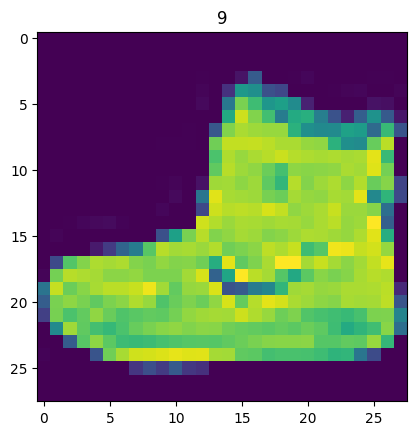

In [428]:
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label)

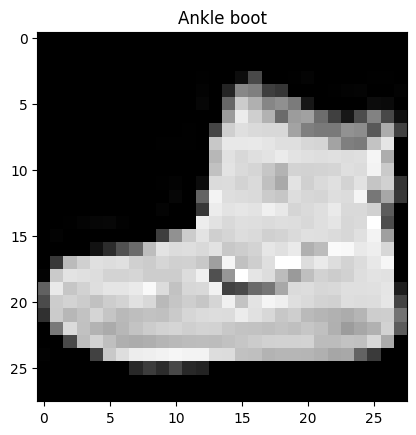

In [429]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);

In [430]:
image.squeeze().shape

torch.Size([28, 28])

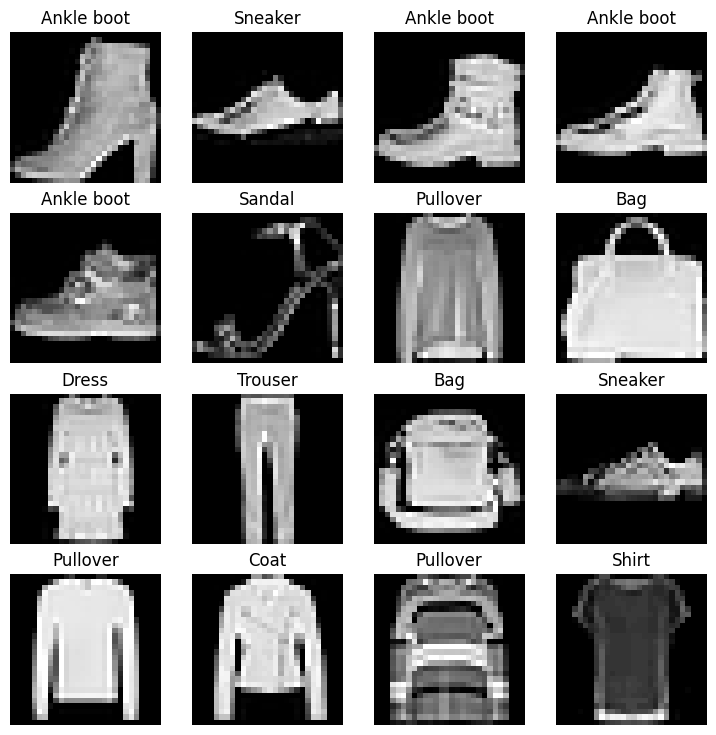

In [431]:
torch.manual_seed(178)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
    random_index = torch.randint(0, len(training_data), size=[1]).item()
    img, label = training_data[random_index]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False);

# 2. Prepare DataLoader
DataLoader helps load data into a model, for both training and inference.
Data is turned into iterables of chunks, i.e. batches or mini-batches.

In [432]:
BATCH_SIZE = 32

training_dataloader = DataLoader(
    dataset=training_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

print(f'Data Loaders: {training_dataloader, test_dataloader}')
print(f'Length of data loader objects: {len(training_dataloader), len(test_dataloader)}')

Data Loaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002153C606B10>, <torch.utils.data.dataloader.DataLoader object at 0x000002154183EB10>)
Length of data loader objects: (1875, 313)


In [433]:
training_features_batch, training_labels_batch = next(iter(training_dataloader))
training_features_batch, training_labels_batch

(tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.2196, 0.0000, 0.0039],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

# 3. Model 0: Build Base Model
A **baseline model** is the simplest model imaginable.

In [434]:
flatten_model = nn.Flatten()

x = training_features_batch[0]
output = flatten_model(x)

print(f'Shape of a single data point before being flattened: {x.shape},'
      f'Shape of a single data after being flattened: {output.shape}')

Shape of a single data point before being flattened: torch.Size([1, 28, 28]),Shape of a single data after being flattened: torch.Size([1, 784])


In [435]:
class FashioMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [436]:
torch.manual_seed(178)

model_0 = FashioMNISTModelV0(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)
                             )
model_0.to('cpu')

FashioMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## 3.1 Setup Loss and Optimizer, and Evaluation Metrics

In [437]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [438]:
def print_training_time(start: float, end: float, device: torch.device=None):
    total_time = end - start
    print(f'Training Time: {total_time: .3f} seconds')
    return total_time

## 3.2 Create a Training Loop and Train Model on Batches

Keep in mind that the loss and evaluation metrics are computed **per batch**

In [439]:
torch.manual_seed(178)
training_time_start = timer()

epochs = 10

accuracy_func = torchmetrics.Accuracy(task='multiclass',
                                      num_classes=len(class_names),
                                      )

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}')
    ## TRAINING
    training_loss = 0

    for batch, (X, y) in enumerate(training_dataloader):
        model_0.train()

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. loss per batch
        loss = loss_func(y_pred, y)
        training_loss += loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backwards
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    training_loss /= len(training_dataloader)

    ## TESTING
    test_loss, test_acc = 0, 0

    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_func(test_pred, y)
            test_acc += accuracy_func(test_pred, y)


        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f'Train Loss: {training_loss:.5f},'
          f'Test Loss: {test_loss:.5f},'
          f'Test Accuracy: {test_acc:.5f}')


training_time_end = timer()
total_training_time = print_training_time(training_time_start, training_time_end)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
Train Loss: 0.58495,Test Loss: 0.50940,Test Accuracy: 0.82049
Epoch: 1
Train Loss: 0.47507,Test Loss: 0.49318,Test Accuracy: 0.82907
Epoch: 2
Train Loss: 0.45374,Test Loss: 0.48505,Test Accuracy: 0.82648
Epoch: 3
Train Loss: 0.44151,Test Loss: 0.46806,Test Accuracy: 0.83367
Epoch: 4
Train Loss: 0.43483,Test Loss: 0.53234,Test Accuracy: 0.81110
Epoch: 5
Train Loss: 0.43014,Test Loss: 0.48102,Test Accuracy: 0.83037
Epoch: 6
Train Loss: 0.42656,Test Loss: 0.57253,Test Accuracy: 0.79203
Epoch: 7
Train Loss: 0.42137,Test Loss: 0.46613,Test Accuracy: 0.83417
Epoch: 8
Train Loss: 0.42065,Test Loss: 0.47848,Test Accuracy: 0.82658
Epoch: 9
Train Loss: 0.41731,Test Loss: 0.46368,Test Accuracy: 0.83746
Training Time:  106.027 seconds


In [440]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_func: torch.nn.Module,
               accuracy_func):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)

            loss += loss_func(y_pred, y)
            acc += accuracy_func(y_pred, y)

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        'model_name': model.__class__.__name__,
        'model_loss': loss.item(),
        'model_accuracy': acc.item()
    }

In [441]:
eval_model(model_0,
           test_dataloader,
           loss_func,
           accuracy_func)

{'model_name': 'FashioMNISTModelV0',
 'model_loss': 0.4633491635322571,
 'model_accuracy': 0.8376597166061401}

# 4. Model 1: Non-linear Model

In [442]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [443]:
torch.manual_seed(178)

model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names))

In [444]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [445]:
def training_phase(model: torch.nn.Module,
                  data_loader: torch.utils.data.DataLoader,
                  loss_func: torch.nn.Module,
                  optimizer: torch.optim.Optimizer,
                  accuracy_func,):
    training_loss, training_acc = 0, 0
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss and accuracy
        loss = loss_func(y_pred, y)
        training_loss += loss
        training_acc += accuracy_func(y_pred, y)

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    training_acc /= len(data_loader)
    training_loss /= len(data_loader)

    print(f'Training Loss: {training_loss:.5f},'
          f'Training Accuracy: {training_acc:.5f}')

In [446]:
def test_phase(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_func: torch.nn.Module,
               accuracy_func):
    test_loss, test_acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            test_pred = model(X)

            test_loss += loss_func(test_pred, y)
            test_acc += accuracy_func(test_pred, y)

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

        print(f'Test Loss: {test_loss:.5f},'
              f'Test Accuracy: {test_acc: .5f}')

In [447]:
torch.manual_seed(178)
epochs = 10

start = timer()

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}')
    training_phase(model_1,
                   training_dataloader,
                   loss_func,
                   optimizer,
                   accuracy_func)
    test_phase(model_1,
               test_dataloader,
               loss_func,
               accuracy_func)

end = timer()
total_training_time_model_1 = print_training_time(start, end)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
Training Loss: 1.43905,Training Accuracy: 0.46805
Test Loss: 1.23069,Test Accuracy:  0.57079
Epoch: 1
Training Loss: 1.02710,Training Accuracy: 0.63015
Test Loss: 0.78176,Test Accuracy:  0.72664
Epoch: 2
Training Loss: 0.70690,Training Accuracy: 0.74340
Test Loss: 0.71002,Test Accuracy:  0.74331
Epoch: 3
Training Loss: 0.67676,Training Accuracy: 0.75042
Test Loss: 0.69464,Test Accuracy:  0.74591
Epoch: 4
Training Loss: 0.66022,Training Accuracy: 0.75570
Test Loss: 0.70272,Test Accuracy:  0.74151
Epoch: 5
Training Loss: 0.64911,Training Accuracy: 0.75780
Test Loss: 0.72404,Test Accuracy:  0.72953
Epoch: 6
Training Loss: 0.64110,Training Accuracy: 0.75932
Test Loss: 0.71824,Test Accuracy:  0.73732
Epoch: 7
Training Loss: 0.63349,Training Accuracy: 0.76188
Test Loss: 0.68040,Test Accuracy:  0.74880
Epoch: 8
Training Loss: 0.62688,Training Accuracy: 0.76517
Test Loss: 0.70027,Test Accuracy:  0.74151
Epoch: 9
Training Loss: 0.62060,Training Accuracy: 0.76598
Test Loss: 0.66563,Test

## **Non-linear model performs worse than the linear baseline model**

In [448]:
eval_model(model_1,
           test_dataloader,
           loss_func,
           accuracy_func)

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6657403111457825,
 'model_accuracy': 0.7531948685646057}

In [449]:
eval_model(model_0,
           test_dataloader,
           loss_func,
           accuracy_func)

{'model_name': 'FashioMNISTModelV0',
 'model_loss': 0.4646682143211365,
 'model_accuracy': 0.8373602032661438}

In [450]:
eval_model(model_0,
           training_dataloader,
           loss_func,
           accuracy_func)

{'model_name': 'FashioMNISTModelV0',
 'model_loss': 0.4042064845561981,
 'model_accuracy': 0.8579999804496765}

# 5. Model 2: Convolutional Neural Network (CNN)

CNN models are mostly used to discover patterns in visual data.
Typycal structure of a CNN model:

``` Input layer -> [Convolutional layer -> Activation layer -> Pooling layer] -> Output layer```

In [451]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2),
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        return self.classifier(x)

In [452]:
torch.manual_seed(178)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names))
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [453]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [454]:
torch.manual_seed(178)
start = timer()
epochs = 10

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}')
    training_phase(model_2,
                   training_dataloader,
                   loss_func,
                   optimizer,
                   accuracy_func)

    test_phase(model_2,
               test_dataloader,
               loss_func,
               accuracy_func)

end = timer()

total_training_time = print_training_time(start, end)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
Training Loss: 0.59288,Training Accuracy: 0.78452
Test Loss: 0.42598,Test Accuracy:  0.84365
Epoch: 1
Training Loss: 0.35693,Training Accuracy: 0.87138
Test Loss: 0.34663,Test Accuracy:  0.87760
Epoch: 2
Training Loss: 0.32003,Training Accuracy: 0.88343
Test Loss: 0.33310,Test Accuracy:  0.87530
Epoch: 3
Training Loss: 0.29867,Training Accuracy: 0.89110
Test Loss: 0.30995,Test Accuracy:  0.88878
Epoch: 4
Training Loss: 0.28502,Training Accuracy: 0.89593
Test Loss: 0.31540,Test Accuracy:  0.88349
Epoch: 5
Training Loss: 0.27304,Training Accuracy: 0.90032
Test Loss: 0.32753,Test Accuracy:  0.87979
Epoch: 6
Training Loss: 0.26385,Training Accuracy: 0.90370
Test Loss: 0.30074,Test Accuracy:  0.89197
Epoch: 7
Training Loss: 0.25488,Training Accuracy: 0.90722
Test Loss: 0.28350,Test Accuracy:  0.89886
Epoch: 8
Training Loss: 0.24864,Training Accuracy: 0.90893
Test Loss: 0.29950,Test Accuracy:  0.88888
Epoch: 9
Training Loss: 0.24314,Training Accuracy: 0.91085
Test Loss: 0.29484,Test

In [455]:
eval_model(model_2,
           test_dataloader,
           loss_func,
           accuracy_func)

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2946328818798065,
 'model_accuracy': 0.897164523601532}

In [456]:
eval_model(model_1,
           test_dataloader,
           loss_func,
           accuracy_func)

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6664487719535828,
 'model_accuracy': 0.7531948685646057}

In [457]:
eval_model(model_0,
           test_dataloader,
           loss_func,
           accuracy_func)

{'model_name': 'FashioMNISTModelV0',
 'model_loss': 0.4656889736652374,
 'model_accuracy': 0.8371605277061462}

In [458]:
def make_predictions(model: torch.nn.Module,
                     data: list,):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0)
            pred_logits = model(sample)
            pred_prob = torch.softmax(pred_logits.squeeze(),
                                      dim=0)

            pred_probs.append(pred_prob)

        return torch.stack(pred_probs)

In [459]:
random.seed(178)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [460]:
pred_probs = make_predictions(model_2,
                              test_samples)

pred_probs

tensor([[3.0528e-01, 5.9994e-05, 1.1092e-02, 2.3546e-03, 4.7730e-03, 4.4434e-02,
         5.7538e-01, 6.3712e-03, 5.0182e-02, 7.2366e-05],
        [7.5759e-09, 1.2577e-08, 8.4208e-09, 2.0276e-08, 1.4635e-08, 5.3850e-04,
         1.6450e-08, 9.9945e-01, 6.3786e-07, 8.7340e-06],
        [1.1859e-02, 5.9650e-06, 2.7081e-02, 1.2085e-04, 6.8018e-01, 7.1839e-06,
         2.8068e-01, 1.3656e-07, 5.9618e-05, 1.0464e-05],
        [9.0726e-10, 3.4911e-10, 1.2490e-08, 1.1294e-09, 4.4660e-09, 1.0000e+00,
         1.0602e-08, 3.1318e-07, 3.6129e-06, 8.5081e-08],
        [9.9359e-01, 4.7943e-06, 6.6596e-05, 1.9018e-04, 1.8023e-04, 2.7329e-07,
         5.9556e-03, 3.3952e-08, 8.7705e-06, 4.4835e-07],
        [1.8621e-06, 3.7400e-07, 9.8182e-07, 2.6082e-06, 9.6724e-07, 2.6417e-02,
         5.6261e-06, 5.5510e-03, 1.4535e-03, 9.6657e-01],
        [1.8392e-07, 1.0518e-08, 2.3907e-05, 3.5468e-06, 2.4473e-08, 3.8721e-06,
         1.2351e-07, 2.5334e-07, 9.9997e-01, 8.6309e-09],
        [5.0047e-04, 2.9745

In [461]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 7, 4, 5, 0, 9, 8, 8, 4])

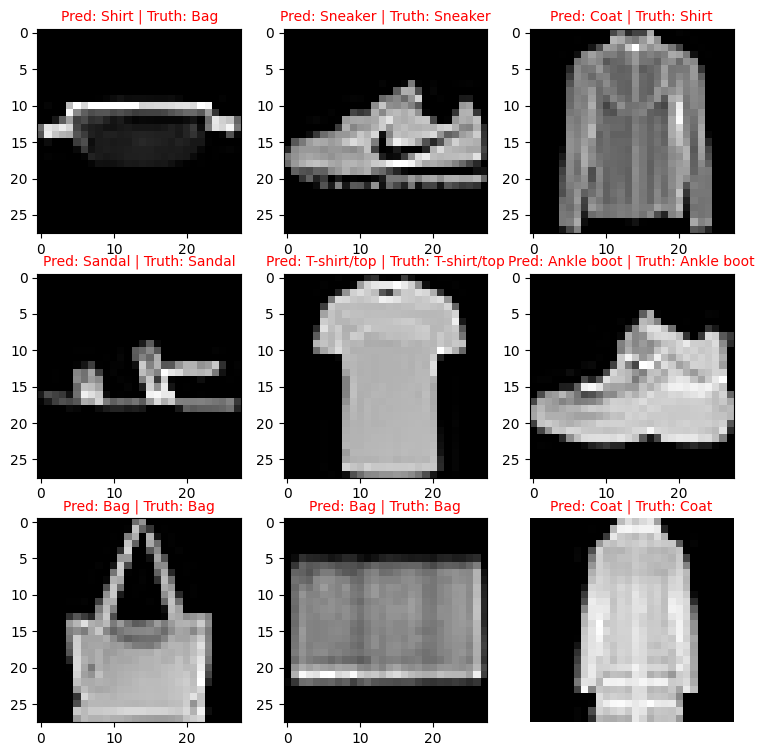

In [462]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)

    plt.imshow(sample.squeeze(), cmap='gray')
    pred_label = class_names[pred_classes[i]]

    true_label = class_names[test_labels[i]]

    title_text = f'Pred: {pred_label} | Truth: {true_label}'
    plt.title(title_text, fontsize=10, c='r')

plt.axis(False);

In [463]:
y_preds = []
model_2.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions'):
        y_logits = model_2(X)

        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

        y_preds.append(y_pred)

y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [464]:
print(mlxtend.__version__)
from mlxtend.plotting import plot_confusion_matrix

0.22.0


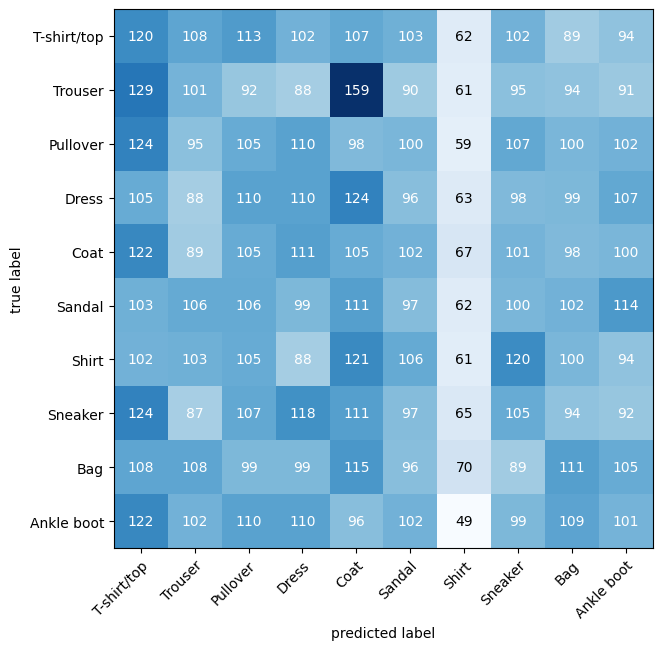

In [465]:
confusion_matrix = torchmetrics.ConfusionMatrix(num_classes=len(class_names),
                                                task='multiclass')
confusion_tensor = confusion_matrix(preds=y_pred_tensor,
                                    target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confusion_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
);